In [1]:
import numpy as np
import pandas as pd
import mdtraj as md
import MDAnalysis as mda
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import seaborn as sns
import MDAnalysis as mda
import mdtraj as md
from matplotlib.ticker import MaxNLocator
import matplotlib as mpl

## Cargamos los datos

### Datos a 303K

In [2]:
data_WT_1_303 = pd.read_csv('303K/WT/1/mdpout_descriptors.txt', delim_whitespace=True)
data_WT_1_303['Variant'] = 'WT'
data_WT_2_303 = pd.read_csv('303K/WT/2/mdpout_descriptors.txt', delim_whitespace=True)
data_WT_2_303['Variant'] = 'WT'
data_S214H_1_303 = pd.read_csv('303K/S214H/1/mdpout_descriptors.txt', delim_whitespace=True)
data_S214H_1_303['Variant'] = 'S214H'
data_S214H_2_303 = pd.read_csv('303K/S214H/2/mdpout_descriptors.txt', delim_whitespace=True)
data_S214H_2_303['Variant'] = 'S214H'
data_TSPETase_1_303 = pd.read_csv('303K/TSPETase/1/mdpout_descriptors.txt', delim_whitespace=True)
data_TSPETase_1_303['Variant'] = 'TSPETase'
data_TSPETase_2_303 = pd.read_csv('303K/TSPETase/2/mdpout_descriptors.txt', delim_whitespace=True)
data_TSPETase_2_303['Variant'] = 'TSPETase'
data_DuraPETase_1_303 = pd.read_csv('303K/DuraPETase/1/mdpout_descriptors.txt', delim_whitespace=True)
data_DuraPETase_1_303['Variant'] = 'DuraPETase'
data_DuraPETase_2_303 = pd.read_csv('303K/DuraPETase/2/mdpout_descriptors.txt', delim_whitespace=True)
data_DuraPETase_2_303['Variant'] = 'DuraPETase'
data_303 = pd.concat((data_WT_1_303, data_WT_2_303, data_S214H_1_303, data_S214H_2_303, data_TSPETase_1_303, 
                      data_TSPETase_2_303, data_DuraPETase_1_303, data_DuraPETase_2_303))

In [3]:
# Nos quedamos con los datos donde el volumen es diferente a cero
data_303 = data_303[data_303.pock_volume != 0]
data_303['Temperature'] = '303'

In [4]:
### Datos a 303K

In [5]:
data_WT_1_315 = pd.read_csv('315K/WT/1/mdpout_descriptors.txt', delim_whitespace=True)
data_WT_1_315['Variant'] = 'WT'
data_WT_2_315 = pd.read_csv('315K/WT/2/mdpout_descriptors.txt', delim_whitespace=True)
data_WT_2_315['Variant'] = 'WT'
data_S214H_1_315 = pd.read_csv('315K/S214H/1/mdpout_descriptors.txt', delim_whitespace=True)
data_S214H_1_315['Variant'] = 'S214H'
data_S214H_2_315 = pd.read_csv('315K/S214H/2/mdpout_descriptors.txt', delim_whitespace=True)
data_S214H_2_315['Variant'] = 'S214H'
data_TSPETase_1_315 = pd.read_csv('315K/TSPETase/1/mdpout_descriptors.txt', delim_whitespace=True)
data_TSPETase_1_315['Variant'] = 'TSPETase'
data_TSPETase_2_315 = pd.read_csv('315K/TSPETase/2/mdpout_descriptors.txt', delim_whitespace=True)
data_TSPETase_2_315['Variant'] = 'TSPETase'
data_DuraPETase_1_315 = pd.read_csv('315K/DuraPETase/1/mdpout_descriptors.txt', delim_whitespace=True)
data_DuraPETase_1_315['Variant'] = 'DuraPETase'
data_DuraPETase_2_315 = pd.read_csv('315K/DuraPETase/2/mdpout_descriptors.txt', delim_whitespace=True)
data_DuraPETase_2_315['Variant'] = 'DuraPETase'
data_315 = pd.concat((data_WT_1_315, data_WT_2_315, data_S214H_1_315, data_S214H_2_315, data_TSPETase_1_315, 
                      data_TSPETase_2_315, data_DuraPETase_1_315, data_DuraPETase_2_315))

In [6]:
# Nos quedamos con los datos donde el volumen es diferente a cero
data_315 = data_315[data_315.pock_volume != 0]
data_315['Temperature'] = '315'

Juntamos toda la data en una data común

In [7]:
data = pd.concat((data_303,data_315))

In [8]:
data.Variant.unique().tolist()

['WT', 'S214H', 'TSPETase', 'DuraPETase']

Realizamos un gráfico de boxplot para ver diferencias entre los individuos.

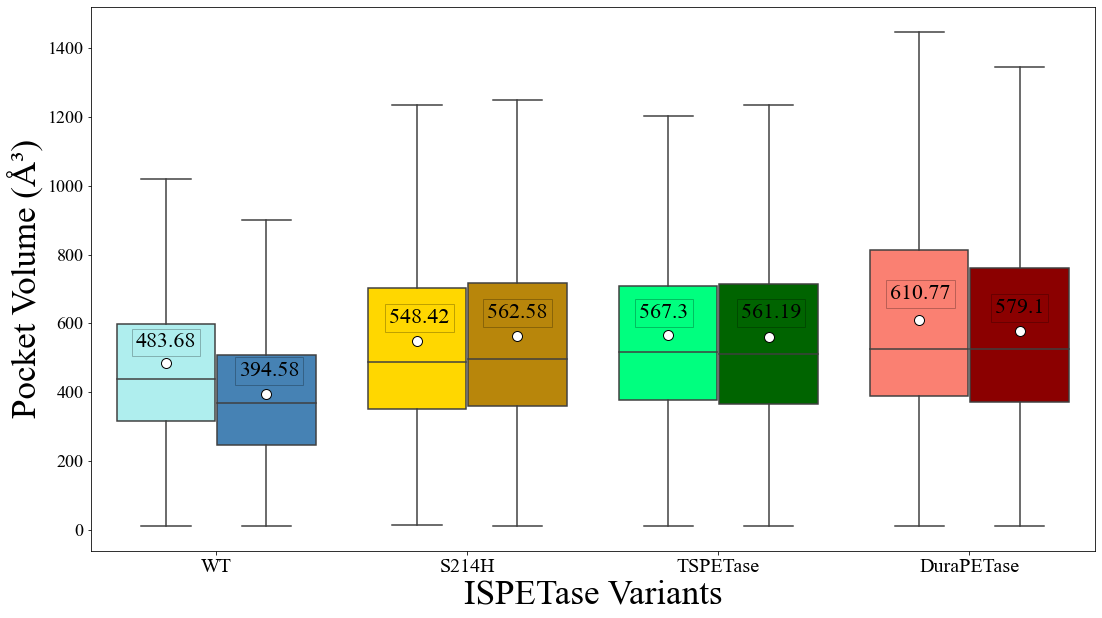

In [10]:
fig = plt.figure(figsize=(18,10))

plt.rcParams["font.family"] = "Times New Roman"

variants = ['WT_303', 'WT_315', 'S214H_303', 'S214H_315', 'TSPETase_303', 'TSPETase_315', 'DuraPETase_303', 'DuraPETase_315']
# Hex code for each continents color
Var_colors=["paleturquoise","steelblue","gold","darkgoldenrod","springgreen", "darkgreen", "salmon", "darkred"]
#Creatye a dictionary to correlated colors
color_dict = dict(zip(variants, Var_colors))

g = sns.boxplot(data=data,
           x='Variant', y='pock_volume', hue='Temperature', showfliers=False, showmeans=True, 
           meanprops={"marker":"o",
                      "markerfacecolor":"white", 
                      "markeredgecolor":"black",
                      "markersize":"10"})
for i in range(0,8):
    mybox = g.artists[i]
    mybox.set_facecolor(color_dict[variants[i]])

## Añadimos texto para las medias
plt.text(-0.32, 530, 
         '{}'.format(round(data[(data['Variant'] == 'WT') & (data['Temperature'] == '303')]['pock_volume'].mean(),2)), 
         bbox=dict(facecolor='paleturquoise', 
                   alpha=0.25), 
         fontsize=22)
plt.text(0.09, 448, 
         '{}'.format(round(data[(data['Variant'] == 'WT') & (data['Temperature'] == '315')]['pock_volume'].mean(),2)), 
         bbox=dict(facecolor='steelblue', 
                   alpha=0.25), 
         fontsize=22)
plt.text(0.69, 600, 
         '{}'.format(round(data[(data['Variant'] == 'S214H') & (data['Temperature'] == '303')]['pock_volume'].mean(),2)), 
         bbox=dict(facecolor='gold', 
                   alpha=0.25), 
         fontsize=22)
plt.text(1.08, 615, 
         '{}'.format(round(data[(data['Variant'] == 'S214H') & (data['Temperature'] == '315')]['pock_volume'].mean(),2)), 
         bbox=dict(facecolor='darkgoldenrod', 
                   alpha=0.25), 
         fontsize=22)
plt.text(1.685, 615, 
         '{}'.format(round(data[(data['Variant'] == 'TSPETase') & (data['Temperature'] == '303')]['pock_volume'].mean(),2)), 
         bbox=dict(facecolor='springgreen', 
                   alpha=0.25), 
         fontsize=22)
plt.text(2.09, 615, 
         '{}'.format(round(data[(data['Variant'] == 'TSPETase') & (data['Temperature'] == '315')]['pock_volume'].mean(),2)), 
         bbox=dict(facecolor='darkgreen', 
                   alpha=0.25), 
         fontsize=22)
plt.text(2.685, 670, 
         '{}'.format(round(data[(data['Variant'] == 'DuraPETase') & (data['Temperature'] == '303')]['pock_volume'].mean(),2)), 
         bbox=dict(facecolor='salmon', 
                   alpha=0.25), 
         fontsize=22)
plt.text(3.1, 630, 
         '{}'.format(round(data[(data['Variant'] == 'DuraPETase') & (data['Temperature'] == '315')]['pock_volume'].mean(),2)), 
         bbox=dict(facecolor='darkred', 
                   alpha=0.25), 
         fontsize=22)
## Ajustamos los tamaños de los labels y los ticks
g.get_legend().remove()
plt.ylabel("Pocket Volume (Å³)", size=35)
plt.yticks(size=18)
plt.xlabel("ISPETase Variants", size=35)
plt.xticks(size=20)
plt.savefig("boxplot_volume_variation.jpg")